<h1 style="color: #4FC3F7;">Required libraries available in requirements.txt file</h1>

[Go to Testing the model Section after running all cells](#change-the-number-inside-diagnosisx-to-whatever-number-you-like-within-31-to-view-the-actual-vs-predicted-diagnosis)

## Imports

**Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(f"Code for Heart Disease Available: {df['target'].unique()[0].item()}")
print(f"Code for No Heart Disease Available: {df['target'].unique()[1].item()}")

Code for Heart Disease Available: 1
Code for No Heart Disease Available: 0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<h2>Data is well spread between 0 and 1<h2>

<Axes: xlabel='target', ylabel='count'>

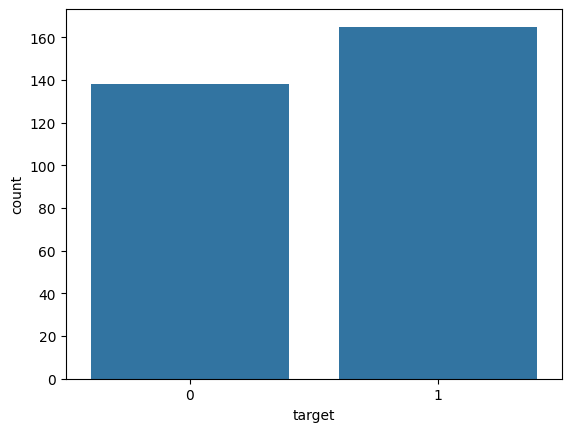

In [6]:
sns.countplot(x='target',data=df)

<h2>Relationships of features with each other.<br>

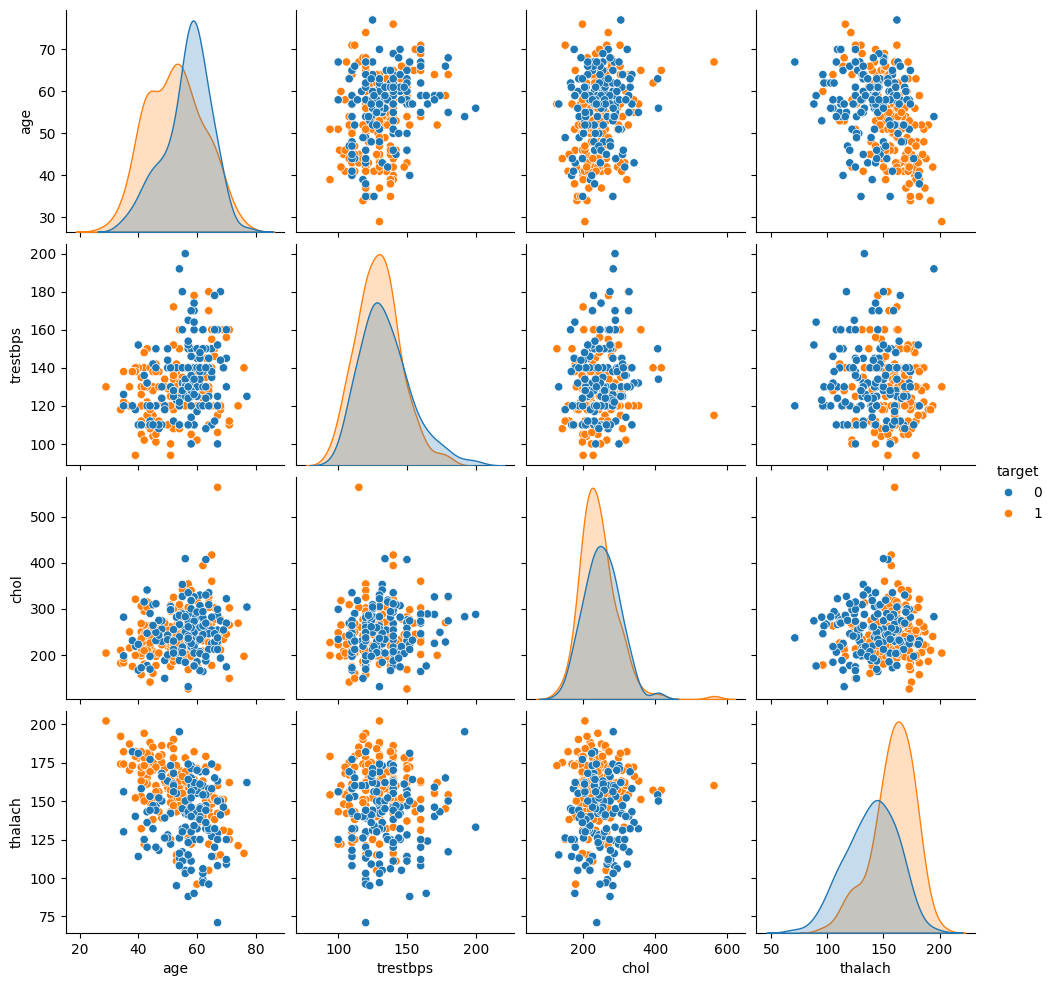

In [7]:
# Running pairplot on everything will take a very long time to render
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<Axes: >

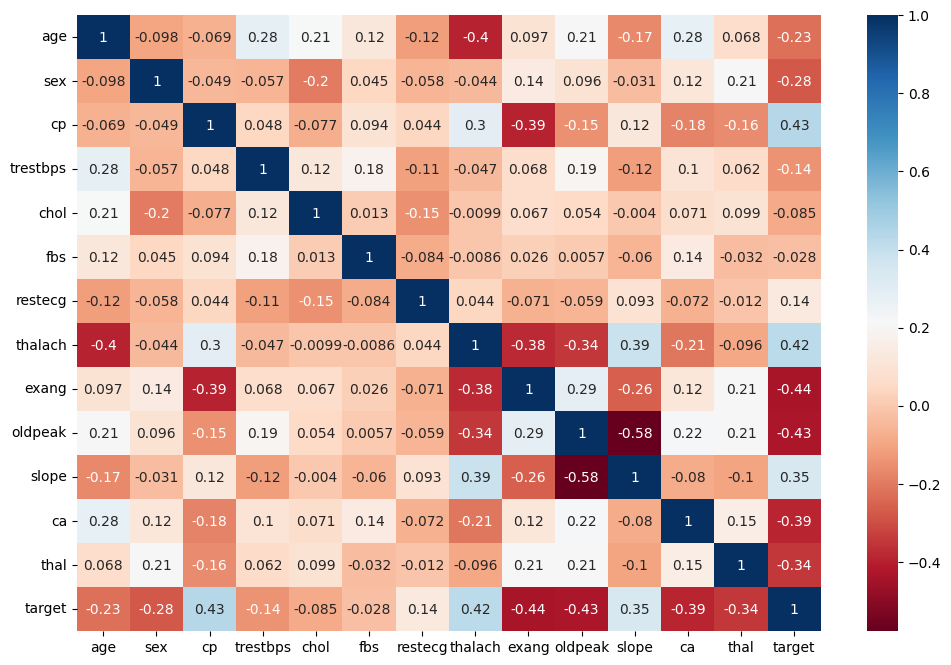

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='RdBu',annot=True)

In [9]:
X = df.drop('target',axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegressionCV 

In [15]:
# help(LogisticRegressionCV)

In [16]:
log_model = LogisticRegressionCV()

In [17]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [18]:
log_model.C_.item()

0.046415888336127774

In [19]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [20]:
log_model.coef_

array([[-0.09624234, -0.39455733,  0.53541263, -0.13845013, -0.0882132 ,
         0.02495565,  0.08083019,  0.29896895, -0.33440044, -0.35252781,
         0.25100118, -0.49732614, -0.37440968]])

In [21]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [22]:
coefs = coefs.sort_values()

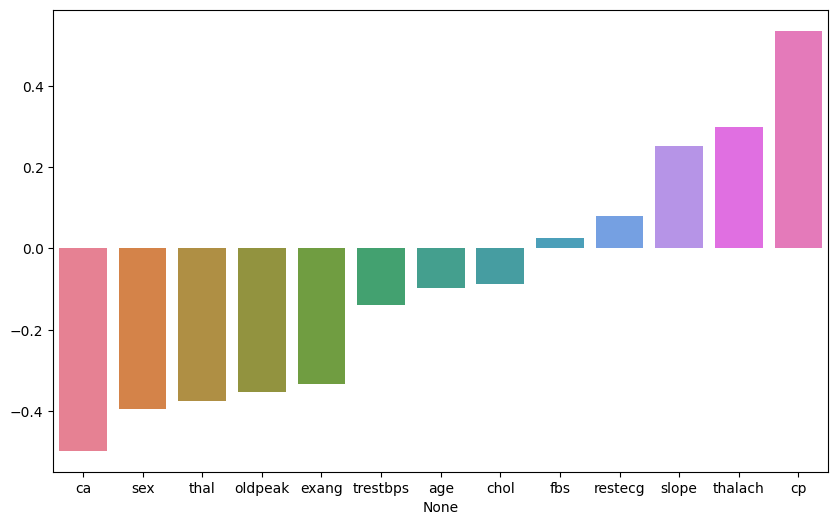

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values, hue=coefs.index);

<h2>Model Evaluation<h2>

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [25]:
y_pred = log_model.predict(scaled_X_test)

In [26]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]])

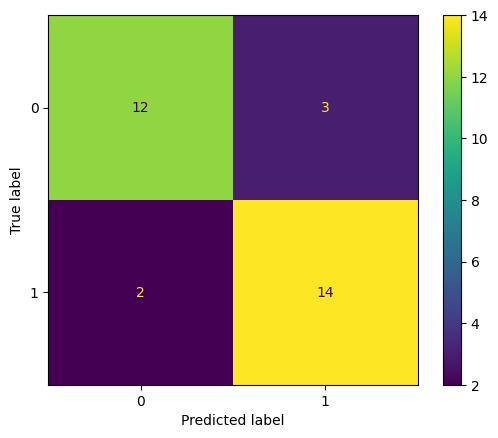

In [27]:
ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [28]:
from sklearn.metrics import  precision_recall_curve, roc_curve, PrecisionRecallDisplay, RocCurveDisplay

# plot_precision_recall_curve,plot_roc_curve

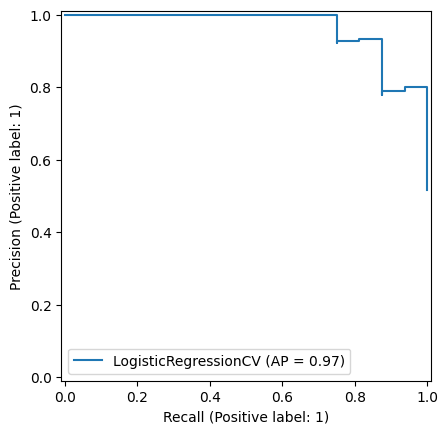

In [29]:
PrecisionRecallDisplay.from_estimator(log_model,scaled_X_test,y_test)

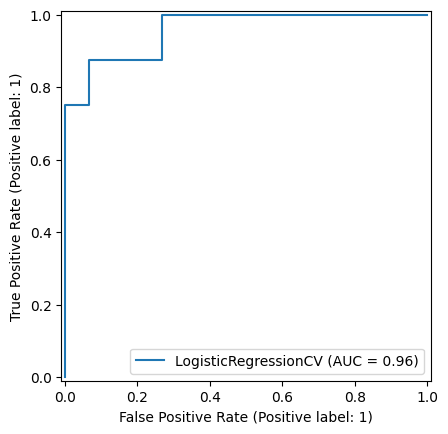

In [30]:
RocCurveDisplay.from_estimator(log_model,scaled_X_test,y_test)

In [31]:
# sns.pairplot(df, hue='target')

In [32]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3


In [33]:
X_test.iloc[-30]

age          52.0
sex           1.0
cp            2.0
trestbps    172.0
chol        199.0
fbs           1.0
restecg       1.0
thalach     162.0
exang         0.0
oldpeak       0.5
slope         2.0
ca            0.0
thal          3.0
Name: 8, dtype: float64

In [34]:
def diagnosis(idx):
    result = y_test.iloc[idx]
    if result == 0:
        return f"Real Diagnosis: {result} ==> No Heart Disease Available \n\nPatient Details: \n{X_test.iloc[idx]}"
    elif result == 1:
        return f"Real Diagnosis: {result} ==> Heart Disease Available \n\nPatient Details: \n{X_test.iloc[idx]}"



In [35]:
len(X_test)

31

<h1 style="color: #4FC3F7;">Testing the Model

## Change the number inside diagnosis(-1) to whatever number you like within 31 to view the actual vs predicted diagnosis

In [36]:
print(diagnosis(-1))

Real Diagnosis: 0 ==> No Heart Disease Available 

Patient Details: 
age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64


<h2>Change the number inside scaled_X_test[[-1]] to any number within 31.<br>Make sure it is the same as the number chosen above

In [37]:
print('Predicted Diagnosis:')
print(log_model.predict(scaled_X_test[[-1]]))

Predicted Diagnosis:
[0]


In [38]:
probs = log_model.predict_proba(scaled_X_test[[-1]])
nhd = probs[0][0] *100
hd = probs[0][1] *100

print(f"Probability of No Heart Disease: {nhd} %")
print(f"Probability of Heart Disease: {hd} %")


Probability of No Heart Disease: 94.75144094918689 %
Probability of Heart Disease: 5.248559050813114 %


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



<h4>Thank You<br>Mohannad Alhaj Youssef